유투브 인기 순위 영화 카테고리 맨 위 영상 링크('https://youtu.be/ysW2FxaFOkI')의 댓글 크롤링과 워드 클라우드 가시화

In [1]:
#이 부분은 처음 한번만 실행하면 됨. 
!pip install selenium
!apt-get update
!apt install chromium-chromedriver  # 마우스, 키보드 입력 효과 줄 수 있다.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import matplotlib as mpl
import matplotlib.pyplot as plt

#한글깨짐 방지 -> 하지만 이 코드에선 사용 안함. path로 함.
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'

%config InlineBackend.figure_format = 'retina'

# 라이브러리 임포트
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

import pandas as pd

import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'apt'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'cp'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [5]:
import os
# selenium으로부터 webdriver 모듈을 불러옵니다.
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
# Explicit Wait을 위해 추가
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [6]:

# 인기 급상승 url
url = 'https://www.youtube.com/feed/trending{}'
# 최신, 음악, 게임, 영화
categories = {
    'recent': '',
    'music': '?bp=4gINGgt5dG1hX2NoYXJ0cw%3D%3D',
    'game': '?bp=4gIcGhpnYW1pbmdfY29ycHVzX21vc3RfcG9wdWxhcg%3D%3D',
    'movie': '?bp=4gIKGgh0cmFpbGVycw%3D%3D'
}
# 링크 저장할 경로
link_path = '{}_link.txt'
# 기다리는 시간
wait_time = 10

for cat, path in categories.items():
    current_path = link_path.format(cat)
    current_url = url.format(path)
    with webdriver.Chrome(service=Service(ChromeDriverManager().install())) as driver:
        #크롬 드라이버에 url 주소 넣고 실행
        driver.get(current_url)
        element = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'thumbnail')))

        # 링크 가져오기
        thumbnails = driver.find_elements(By.ID, 'thumbnail')
        links = [t.get_attribute('href') for t in thumbnails if t.get_attribute('href') is not None]

        # shorts 제외 video 링크만 가져오기
        # 게임의 경우 shorts가 리스트에 포함되어 있음
        # videos = driver.find_elements(By.TAG_NAME, 'ytd-video-renderer')
        # thumbnails = [v.find_element(By.ID, 'thumbnail') for v in videos]
        # links = [t.get_attribute('href') for t in thumbnails if t.get_attribute('href') is not None]

        # text 파일로 링크 저장
        mode = 'w' if os.path.exists(current_path) else 'a'
        with open(current_path, mode) as f:
            f.write('\n'.join(links))

recent_link.txt, music_link.txt, movie_link.txt, game_link.txt 이렇게 4개의 링크 파일이 txt로 저장됨. 
그 중 하나를 불러와서 urls(리스트)에 저장해서 사용해보는 시도를 함.

In [52]:
urls =[]
with open("movie_link.txt", "r") as f:
    while True:
        line = f.readline()
        urls.append(line)
        if not line: # 파일 읽기가 종료된 경우
            break
        print(line.strip())
print(urls)

https://www.youtube.com/watch?v=ysW2FxaFOkI
https://www.youtube.com/watch?v=3xQws6Kq5-8
https://www.youtube.com/watch?v=OGx85MetThQ
https://www.youtube.com/watch?v=qHGUxDHFxYU
https://www.youtube.com/watch?v=Ef1TBzqgLk4
https://www.youtube.com/watch?v=iuk77TjvfmE
https://www.youtube.com/watch?v=b_bBb1PO_N0
https://www.youtube.com/watch?v=108oUvOd3mY
https://www.youtube.com/watch?v=zmNRHgRG3lo
https://www.youtube.com/watch?v=RzZGxYm19WA
https://www.youtube.com/watch?v=CCGGQHcHWCY
https://www.youtube.com/watch?v=FEU2DoCMUMM
https://www.youtube.com/watch?v=jyasXXWd0VA
https://www.youtube.com/watch?v=lBO5bJVH9eg
https://www.youtube.com/watch?v=aLsV10F4R_E
https://www.youtube.com/watch?v=UoXfG4uxl6o
https://www.youtube.com/watch?v=19ikl8vy4zs
https://www.youtube.com/watch?v=ZsrahE6znRA
https://www.youtube.com/watch?v=RDE6Uz73A7g
https://www.youtube.com/watch?v=1VhA9aITCGg
https://www.youtube.com/watch?v=HnzNZ0Mdx4I
https://www.youtube.com/watch?v=GRyt3Ov4zz0
https://www.youtube.com/watch?v=

In [53]:
urls = urls[:2] #크롤링 시도해 볼 url (시간 상 두개만 제한)

In [54]:
urls

['https://www.youtube.com/watch?v=ysW2FxaFOkI\n',
 'https://www.youtube.com/watch?v=3xQws6Kq5-8\n']

In [95]:
from prompt_toolkit.formatted_text.html import html_escape

user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'
url = "https://www.youtube.com/feed/trending"

options = webdriver.ChromeOptions()
# 크롬창 띄우기 X
# options.add_argument('headless')
options.add_argument('window-size=1920*1080')
# 크롤링 성능 향상
options.add_argument('disable-gpu')
options.add_argument('lang=ko_KR, en_US')
options.add_argument('user-agent=' + user_agent)

driver = webdriver.Chrome('chromedriver', options=options)

#driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options = options)

#url = "https://www.youtube.com/feed/trending"

# 파싱해서 넣을 실제 데이터 리스트
id_final = []
comment_final = []

for url in urls:  
    
    driver.get(url) # 링크 열기
    driver.implicitly_wait(3)
    
    time.sleep(1.5)

    driver.execute_script('window.scrollTo(0, 800)') # 한번 스크롤
    time.sleep(3)

    last_height = driver.execute_script('return document.documentElement.scrollHeight') # 스크롤 전체 높이

    while True:
      driver.execute_script('window.scrollTo(0, document.documentElement.scrollHeight);') # 스크롤 다운
      time.sleep(1.5)

      new_height = driver.execute_script('return document.documentElement.scrollHeight') # 스크롤 다운 후 스크롤 높이 

      if new_height == last_height: # 댓글 마지막 페이지면 while문 벗어남
        break

      last_height = new_height
      time.sleep(1.5)

      try:
        driver.find_element_by_css_selector('#dismiss-button > a').click() # 유튜브 1달 무료 팝업닫기

      except:
        pass
    
    
    # 댓글 크롤링 
    html_source = driver.page_source
    soup = BeautifulSoup(html_source, 'html.parser')

    id_list = soup.select('div#header-author > h3 > #author-text > span') # id 리스트
    comment_list = soup.select('yt-formatted-string#content-text') # comment 리스트  
    
    '''
    # 파싱해서 넣을 실제 데이터 리스트
    youtube_id = youtube_id
    youtube_comment = youtube_comment
    '''
    
    for i in range(len(comment_list)):
      temp_id = id_list[i].text
      temp_id = temp_id.replace('\n', '').replace('\t', '').replace(' ', '').strip()
      id_final.append(temp_id) # 댓글 작성자

      temp_comment = comment_list[i].text
      temp_comment = temp_comment.replace('\n', '').replace('\t', '').replace('\r', '').strip()
      comment_final.append(temp_comment) # 댓글 내용

    '''       
    # DataFrame 만들기(list -> dictionary -> dataframe)
    # list -> dictionary
    youtube_dic = {"아이디":id_final, "댓글 내용": comment_final}
    # dictionary -> dataframe
    youtube_pd = pd.DataFrame(youtube_dic)

    youtube_pd.head()
    ''' 


In [96]:
len(id_final)

1765

In [124]:
comment_final[:10] 


['이 시리즈는 제발 잘 만들려고 힘주지 말고 스텝, 배우 모두 즐기는 마음으로 캐주얼하게 쭈욱 이어나갔으면...!',
 '나쁜 표현은 아닌데, 아무 생각 없이 극장에서 시원하게 즐길 수 있는 영화가 되었으면 좋겠네요! 다른 영화들이 나쁘다는 건 아닌데 미리 찾아봐야 하거나 이전 작품들을 봐야 하는, 그런 피로감이 필요 없는 영화였으면 합니다! <범죄도시 3> 파이팅!',
 '마동석 특유의 그 강렬하고 통쾌한 타격감이 기대되고, 마동석님만 할 수 있는 드립까지 너무 재밌게 봤는데 이번 범죄도시 3도 너무 기대되네요!',
 '마동석 액션은 언제나 너무 시원하고 좋다 ㅋㅋㅋ',
 '이준혁 미쳤다….빨리 개봉했으면',
 '영화뿐만아니라 드라마 세계관으로도 확장했으면 하는 시리즈임',
 '"미친새끼가 경찰한테 약을 뺐겨?!"너무 멋있다 진짜...',
 '한달남았네 기대된다 법이 약자를 보호해주지 못하고 썩어 문드러져가는 세상에서 통쾌함과 시원함 등의 대리만족을 할 수 있었던 기억에 남는 영화 시리즈였음',
 '이야 주성철 섬뜩하게 나온다던데 벌써 포스가 느껴진다... 개인적으로 좋아하는 배우님이라 기대가 크다 빨리 영화관에서 보고 싶음 ㅜㅜㅜ',
 '호~호~이준혁의 잠깐이지만 임팩트있는 무언가...그리고 어김없는 깨알유머...그리고 더 화끈해진 호쾌한 액션! 이거 뭔가 기대감상승에 불을 더 지피시는군요~완전 기대합니다.']

In [126]:
comment_final[758:768] #여기서 부터 두번째 영상 관련 댓글

['간만에 가슴이 웅장해지는 예고편이다.제발 이 느낌 그대로만 뽑혔기를...',
 '세계관 전체로 보면 진짜 별거 없는 능력인데도;난 왜 이 굉장한 메타휴먼들 중에서도 배트맨만 보면 가슴이 뛰는가',
 '에즈라가 개막장 짓거리를 했어도 어떻게든 영화 개봉하려고 했던 이유가 있네.. DC 플래시포인트를 저런식으로 표현한다는 게 대단한 듯.',
 '제일 중요한 주연배우가 그렇게 구설수 많은데도 꼭 개봉해야 되는 이유가 있구나... 이번에 진짜 기대가 됩니다',
 '주연 배우가 업계 퇴출급 리스크를 지고 있고, 총괄 프듀고 갈고 세계관 다 갈아 엎으면서까지 개봉 강행하는거 보면 ㅈㄴ 띵작인건 확실해 보인다. 예고편만 봐도 설레이는건 오랜만이다.',
 '진짜 이번 년도가 히어로 장르에 관심을 갖게 될 마지막 시즌일 수도 있는 만큼, 꼭 잘 나왔으면 좋겠다! 더 플래시는 DC의 "더" 기운(더 수스쿼, 더 배트맨)을 이어서, 좋은 모습을 보여주기를',
 '진짜 연출과 향수자극 완벽하네 다시 명성을 되찾자!!',
 'DC가 드디어 일을 하네. 문제 많은 배우도 안고 갈 정도로 잘 뽑은 게 확실하다.',
 '단순히 더 플래시 영화가 아니라 DC가 제대로 끝맺음 하고 싶었던 이유가 있었구나,,ㅠㅠㅠㅠㅠㅠㅠ 재밌겠다 진짜',
 '2:24 로고 합쳐질 때 진짜 개소름ㄷㄷㄷ']

In [127]:
# DataFrame 만들기(list -> dictionary -> dataframe)
# list -> dictionary
youtube_dic = {"아이디":id_final, "댓글 내용": comment_final}
# dictionary -> dataframe
youtube_pd = pd.DataFrame(youtube_dic)

youtube_pd.head()

,아이디,댓글 내용
0,껄껄껄,"이 시리즈는 제발 잘 만들려고 힘주지 말고 스텝, 배우 모두 즐기는 마음으로 캐주얼..."
1,선별적공감요망,"나쁜 표현은 아닌데, 아무 생각 없이 극장에서 시원하게 즐길 수 있는 영화가 되었으..."
2,덱,"마동석 특유의 그 강렬하고 통쾌한 타격감이 기대되고, 마동석님만 할 수 있는 드립까..."
3,김민석,마동석 액션은 언제나 너무 시원하고 좋다 ㅋㅋㅋ
4,purple,이준혁 미쳤다….빨리 개봉했으면


In [128]:
len(youtube_pd) # 5월 2일 오후 5시 40분 기준 1062 + 1420 = 2482개 

1765

In [129]:
youtube_pd

,아이디,댓글 내용
0,껄껄껄,"이 시리즈는 제발 잘 만들려고 힘주지 말고 스텝, 배우 모두 즐기는 마음으로 캐주얼..."
1,선별적공감요망,"나쁜 표현은 아닌데, 아무 생각 없이 극장에서 시원하게 즐길 수 있는 영화가 되었으..."
2,덱,"마동석 특유의 그 강렬하고 통쾌한 타격감이 기대되고, 마동석님만 할 수 있는 드립까..."
3,김민석,마동석 액션은 언제나 너무 시원하고 좋다 ㅋㅋㅋ
4,purple,이준혁 미쳤다….빨리 개봉했으면
...,...,...
1760,AhnJosh,"결국 올드배트맨 얼굴을 깠군~~~, 올드팬들, 극장 들어오라고~ 근데,신비감 이미 ..."
1761,GENESISG80,마블에 비하면 참 허접하다
1762,ssslll,ㅈㄴ구린데 왤케 호들갑들임?
1763,미누,플래시의 문제점1. 제목이 플래시인데 영화 내용은 무슨어벤져스마냥 거창하게 만듬2....


워드 클라우드로 가시화 단계

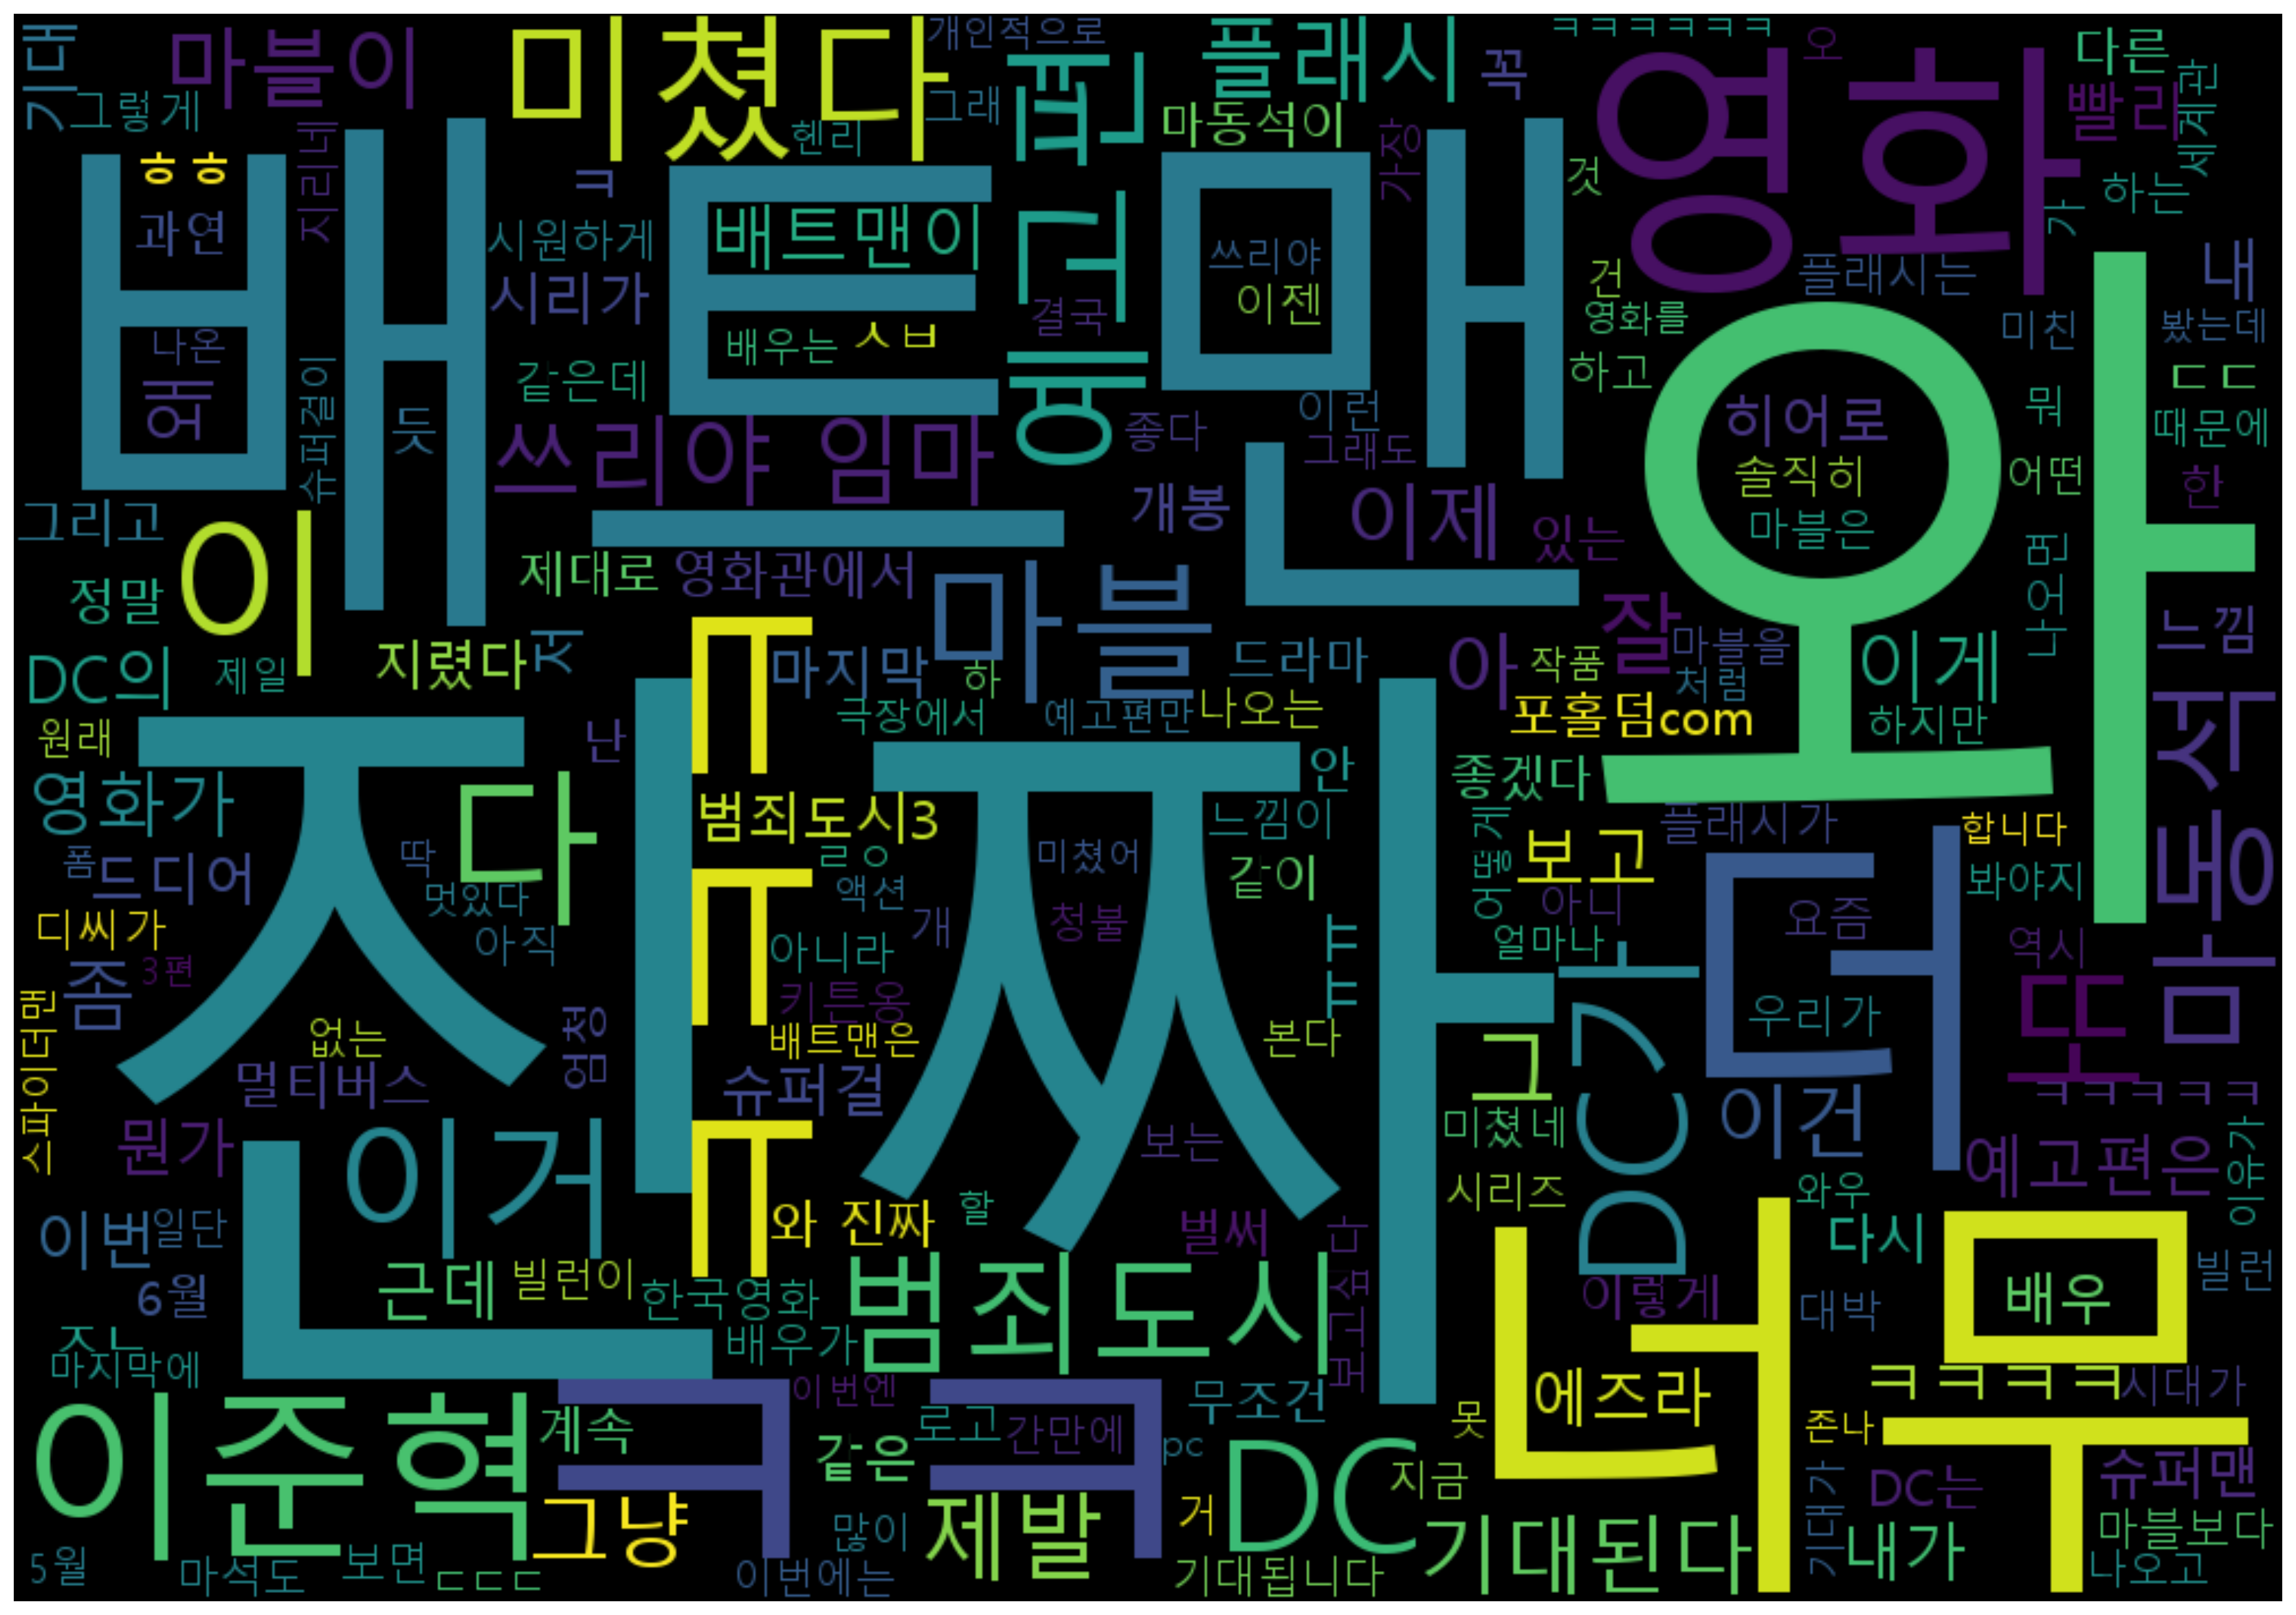

In [130]:
text =" ".join(li for li in youtube_pd['댓글 내용'].astype(str))

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum


plt.subplots(figsize = (25, 15))
wordcloud = WordCloud(background_color = 'black', width = 1000, height = 700, font_path="C:\Windows\Fonts\malgun.ttf").generate(text)
plt.axis('off')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()
